In [1]:
using Pkg
using Knet

In [2]:
# using NBInclude
# @nbinclude("Bimodal_Embedding.ipynb")
include("Bimodal_Embedding.jl")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
 Installed PlotThemes ─ v1.0.0
 Installed Plots ────── v0.28.1
  Updating `~/.julia/environments/v1.2/Project.toml`
  [91a5bcdd] ↑ Plots v0.28.0 ⇒ v0.28.1
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [ccf2f8ad] ↑ PlotThemes v0.4.0 ⇒ v1.0.0
  [91a5bcdd] ↑ Plots v0.28.0 ⇒ v0.28.1
  Building Plots → `~/.julia/packages/Plots/AXUqs/deps/build.log`
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no chan

LoadError: MethodError: no method matching reluback(::Float64, ::Float32)
Closest candidates are:
  reluback(::Float64, !Matched::Knet.Bcasted{#s181} where #s181<:(KnetArray{Float64,N} where N)) at /Users/deniz/.julia/packages/Knet/HRYiN/src/binary.jl:126
  reluback(::T<:Number, !Matched::T<:Number) where T<:Number at /Users/deniz/.julia/packages/Knet/HRYiN/src/unary.jl:54
  reluback(!Matched::AutoGrad.Value{##408}, ::##409) where {##408, ##409} at none:0
  ...

In [3]:
#=

dataset_instructions = []

open("instructions_unique.txt") do file
    for f in eachline(file)
    push!(dataset_instructions,f)    
    end
end
# if (gpu()>=0)
#     dataset_instructions = KnetArray(dataset_instructions)
# end
summary(dataset_instructions[1])


LoadError: syntax: incomplete: unterminated multi-line comment #= ... =#

In [4]:
Pkg.add("VideoIO"); using VideoIO

 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


In [5]:
Pkg.add("Images"); using Images; Pkg.add("Colors"); using Colors

 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


In [6]:
function GetPreProcessedImageArrayDataset(img, cropfromleft::Float64, cropfromright::Float64, cropfromtop::Float64, cropfrombottom::Float64, target_height::Int, target_width::Int)
    channels, height, width = size(img)
    img = img[:,Int(round(height*cropfromtop))+1:Int(round((1-cropfrombottom)*height)), Int(round(width*cropfromleft))+1:Int(round((1-cropfromright)*width))]
    img = imresize(img, (channels, target_height, target_width))
    permutedims(img, (2,3,1))
end

GetPreProcessedImageArrayDataset (generic function with 1 method)

In [7]:
#=

io = VideoIO.open("montezuma2.mp4")
f = VideoIO.openvideo(io)
target_width = 160
target_height = 210
crop_from_top = 0.1
crop_from_bottom = 0.12
crop_from_left = 0.15
crop_from_right = 0.15
img = read(f)
img = GetPreProcessedImageArrayDataset(channelview(img), crop_from_left, crop_from_right, crop_from_top, crop_from_bottom, target_height, target_width)
# img = reinterpret.(UInt8,img)
frame_pairs = []
println(summary(img))
current_frame = img

while !eof(f)
    global current_frame
    prev_frame = current_frame
    current_frame = read(f)
    current_frame = GetPreProcessedImageArrayDataset(channelview(current_frame), crop_from_left, crop_from_right, crop_from_top, crop_from_bottom,target_height, target_width)
#     current_frame = reinterpret.(UInt8,current_frame)
#     current_frame = UInt8.(current_frame)
    push!(frame_pairs, (prev_frame, current_frame))

end

# if (gpu()>=0)
#     frame_pairs = KnetArray(frame_pairs)
# end
close(f)
summary(frame_pairs)

LoadError: syntax: incomplete: unterminated multi-line comment #= ... =#

In [8]:
#summary(frame_pairs[1])

In [9]:
#b = Knet.load("bimodalv6.jld2", "model")
#summary(b)

In [10]:
#=


check_dataset = []
for i in 1:length(frame_pairs)
    for j in 1:length(dataset_instructions)
        data = (frame_pairs[i],dataset_instructions[j])
        push!(check_dataset,data)
    end
end
println(summary(check_dataset))
# if (gpu()>=0)
#     check_dataset = KnetArray(check_dataset)
# end
minibatches = minibatch(check_dataset, ones(length(check_dataset)), BATCHSIZE)
summary(minibatches)

LoadError: syntax: incomplete: unterminated multi-line comment #= ... =#

In [11]:
# both_frames = hcat(frame_pairs[1][1], frame_pairs[1][2])
# summary(both_frames)
# channelview(RGB, both_frames)
#(x,y)= first(minibatches)
#println(summary(x))

In [12]:
# b(check_dataset)
# b(minibatches)
#convertsimilaritytoprobdist(b(first(minibatches)[1]))

In [13]:
#=

hope_dataset = []
# similarity_array = convertsimilaritytoprobdist(b(minibatches))
counter = 0
for batch in minibatches
    global counter 
      similarity_array = convertsimilaritytoprobdist(b(batch[1]))
    for i = 1:BATCHSIZE
        x = argmax(similarity_array[:,i])
        println(counter*40+i)
        if x == 1
             push!(hope_dataset,check_dataset[counter*40+i])
        end
    end
    counter += 1
    
end

# if (gpu()>=0)
#     hope_dataset = KnetArray(hope_dataset)
# end
# argmax(convertsimilaritytoprobdist(b(first(dtst)[1]))[:,sample])

LoadError: syntax: incomplete: unterminated multi-line comment #= ... =#

In [14]:
 #net.save("hopeDataset.jld2", "model", hope_dataset)

In [15]:
hope_dataset = Knet.load("hopeDataset.jld2", "model")
summary(hope_dataset)

"25418-element Array{Tuple{Tuple{Array{Normed{UInt8,8},3},Array{Normed{UInt8,8},3}},String},1}"

In [16]:
summary(hope_dataset[1][1][1])

"210×160×3 Array{N0f8,3} with eltype Normed{UInt8,8}"

In [17]:
using TestImages,Images, Colors

In [18]:
#colorview(RGB, permutedims(hcat(hope_dataset[1655][1][1],hope_dataset[1655][1][2]), (3,1,2)))

In [19]:
#hope_dataset[1655][2]

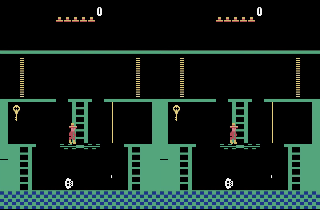

Get the torch


stdin>  exit


In [20]:
true_data = []
begin_index = 1
for i = begin_index:length(hope_dataset)
    IJulia.clear_output(true)
    display(colorview(RGB, permutedims(hcat(hope_dataset[i][1][1],hope_dataset[i][1][2]), (3,1,2))))
    println(hope_dataset[i][2])
    println("count: ", i)
    response = readline()
    if(response=="y")
        push!(true_data, hope_dataset[i])
    elseif(response=="n")
        continue
    elseif(response=="exit")
        break       
    end
end

In [21]:
length(true_data)

1